In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from iit_tpm import make_tpm, tpm_series, serie_plot, tpm_syn, dis_mean
from grn_tpm import iit_tpm_cal

def decimal_to_binary(decimal, min_length=1):
    if min_length == 0:
        return ''
    if decimal == 0:
        return "0" if min_length == 1 else "0".zfill(min_length)
    binary = ""
    while decimal > 0:
        binary = str(decimal % 2) + binary
        decimal = decimal // 2
    # 使用 zfill 确保二进制字符串至少有 min_length 长度
    return binary.zfill(min_length)


bnet = {
    ('B', "C", 'A'): 'bc_a',

    ('E1', 'E2', 'A'): '12_a'

}

ImportError: cannot import name 'dis_mean' from 'iit_tpm' (/home/yuanbing/data/test/ymz_nis/Local-EI-project/exp/bool_network/grn/iit_tpm.py)

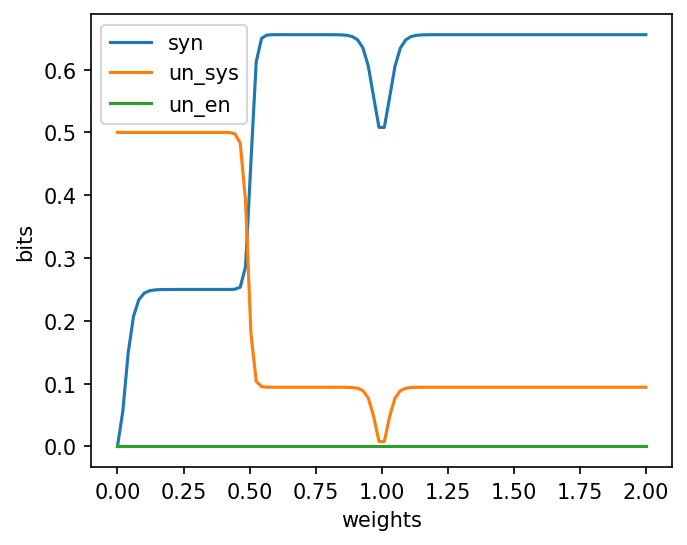

In [2]:
syn_list = []
un_sys_list = []
un_en_list = []
w_axis = np.linspace(0, 2, 100)
for w in w_axis:
    
    tpm_v = tpm_syn(k=30, w=w)
    un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=2) 
    syn_list.append(syn)
    un_sys_list.append(un_sys)
    un_en_list.append(un_en)
    
plt.figure(figsize=(5,4),dpi=150)
plt.plot(w_axis, syn_list, label='syn')
plt.plot(w_axis, un_sys_list, label="un_sys")
plt.plot(w_axis, un_en_list, label="un_en")
plt.xlabel('weights')
plt.ylabel('bits')
plt.legend()

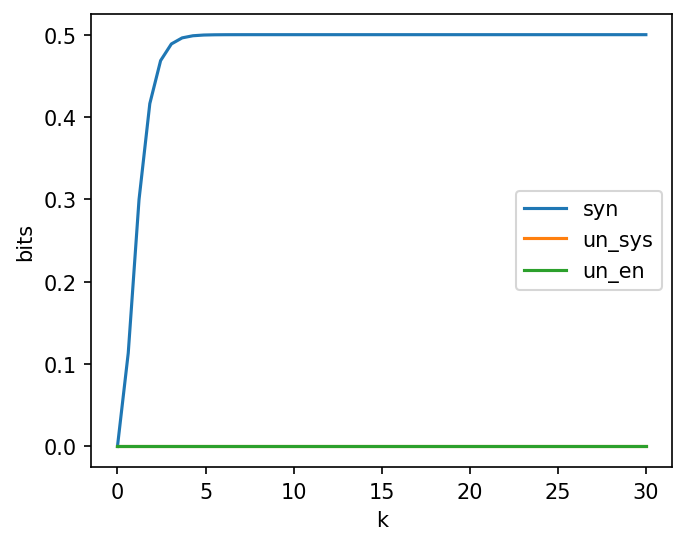

In [3]:
syn_list = []
un_sys_list = []
un_en_list = []
k_axis = np.linspace(0, 30, 50)
for k in k_axis:
    
    tpm_v = tpm_syn(k=k, w=1)
    un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=2) 
    syn_list.append(syn)
    un_sys_list.append(un_sys)
    un_en_list.append(un_en)
    
plt.figure(figsize=(5,4),dpi=150)
plt.plot(k_axis, syn_list, label='syn')
plt.plot(k_axis, un_sys_list, label="un_sys")
plt.plot(k_axis, un_en_list, label="un_en")
plt.xlabel('k')
plt.ylabel('bits')
plt.legend()

In [35]:
k_axis = [0.01, 0.1, 0.2, 0.5, 1, 5]#np.linspace(0, 1, n)
n = len(k_axis)
seeds = 5
steps = 10
dis_k = np.zeros([n, steps])
dis_std = np.zeros([n, steps])
syn_ls = []
for m,k in enumerate(k_axis):
    dis_arr = np.zeros([seeds, steps])
    for seed in range(seeds):
        for step in range(0, steps):
            _,_, syn, series_ls = serie_plot(bnet, w=1, k=k, steps=step, seed=seed, name='', leg=False, syn_inter=True)
            dis_arr[seed, step] = dis_mean(series_ls)
    syn_ls.append(syn)
    dis_k[m, :] = dis_arr.mean(axis=0)
    dis_std[m, :] = dis_arr.std(axis=0)

Text(0, 0.5, 'Mean Distance')

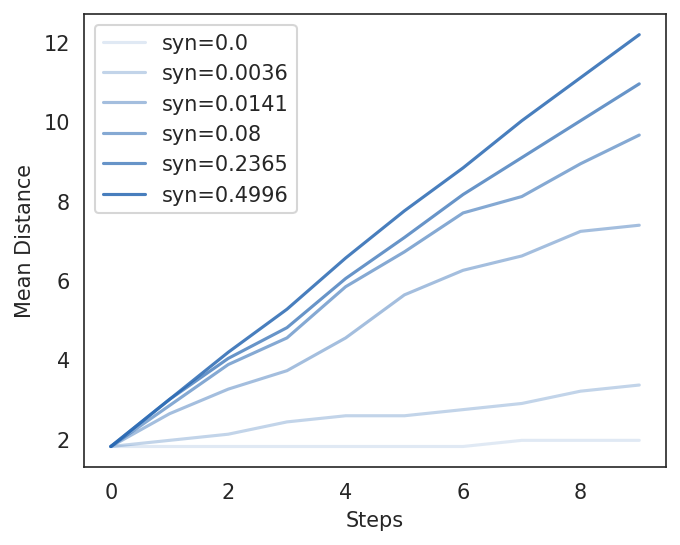

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = ["#BB4F4F", '#2A69B3', '#74B38F', '#FFA500', '#8A2BE2', '#DAA520', '#FF4500']
# 设置Seaborn风格为whitegrid
sns.set_style("white")

plt.figure(figsize=(5,4), dpi=150)
for i in range(n):
    plt.plot(dis_k[i, :], label='syn='+str(np.round(syn_ls[i], 4)), color='#2A69B3', alpha=(i+1)/7)
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Mean Distance')

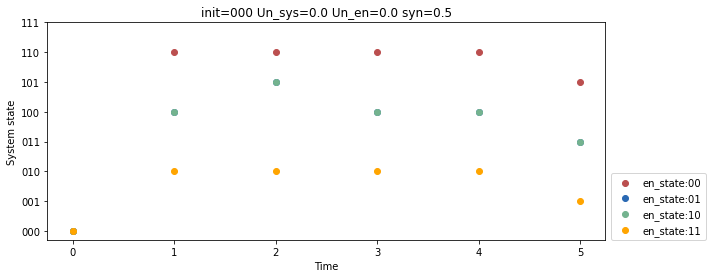

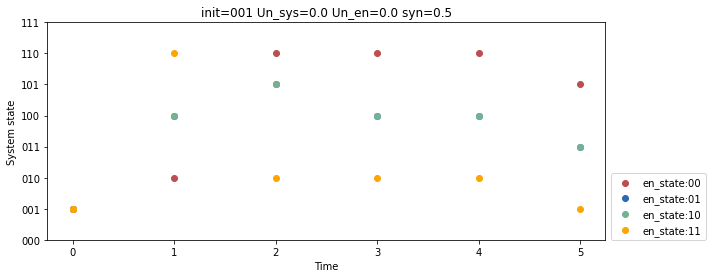

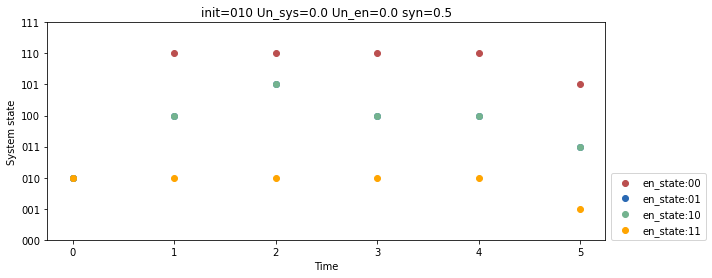

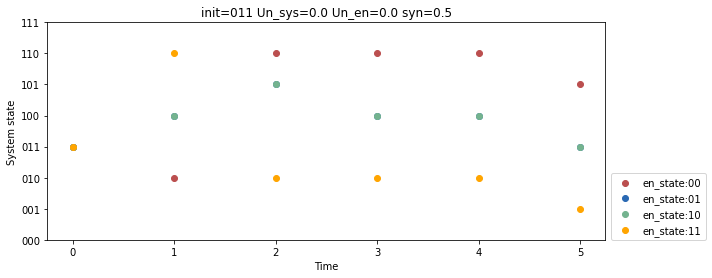

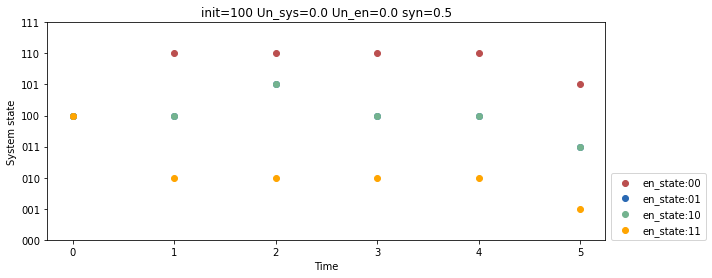

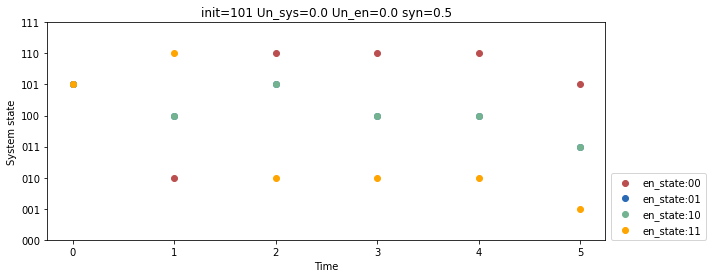

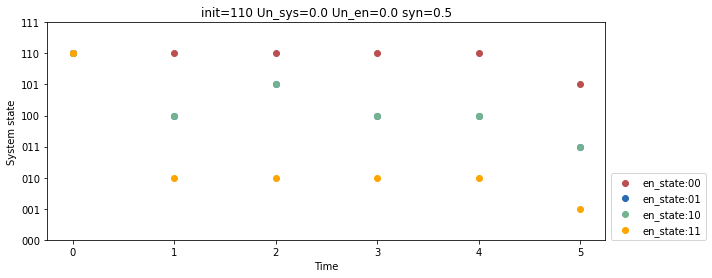

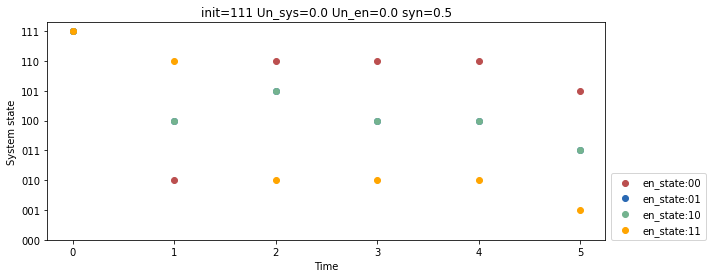

In [83]:
seeds = 1
steps = 5
tpm_v = tpm_syn(k=30, w=1)
name = 'k=0.2_w=1'
un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=2)   
colors = ["#BB4F4F", '#2A69B3', '#74B38F', '#FFA500']
strs = [decimal_to_binary(i, min_length=3) for i in range(8)]
for init_state in strs:
    fig, ax = plt.subplots(figsize=(10,4))
    for indx,en in enumerate(["00", "01", "10", "11"]):
        #en = '10'
        #indx = 2
        en_state = en
        for seed in range(seeds):
            seed = seed 
            serie, serie_str = tpm_series(tpm_dic[en_state], init_state, steps, seed)

            # 由于二进制字符串不能直接作为y轴的值，我们可以使用它们的索引作为y轴的值
            ax.scatter(range(steps+1), serie, label='en_state:'+en_state, color=colors[indx])

    # 设置轴标签
    ax.set_xlabel('Time')
    ax.set_ylabel('System state')

    # 设置y轴的标签
    ax.set_yticks(range(8))
    ax.set_yticklabels(strs)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc=[1.01, 0])
    plt.title('init=' + init_state + ' Un_sys=' + str(round(un_sys,4)) + ' Un_en=' + str(round(un_en,4)) +' syn=' + str(round(syn,4)))
    # 显示图形
    plt.show()

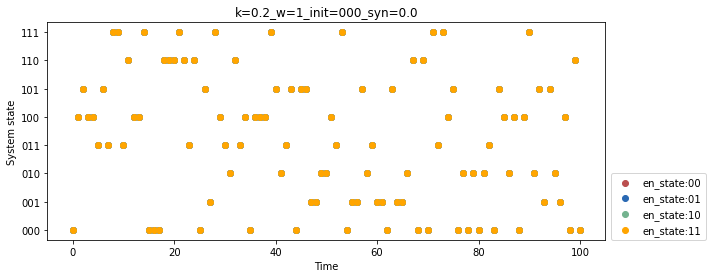

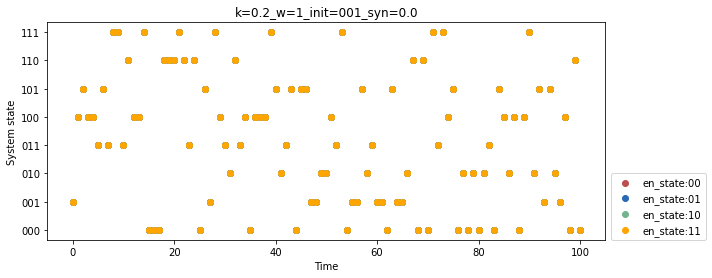

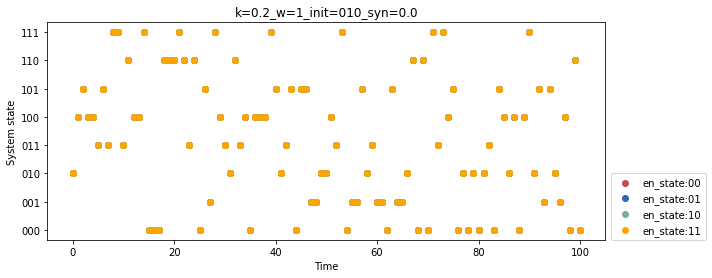

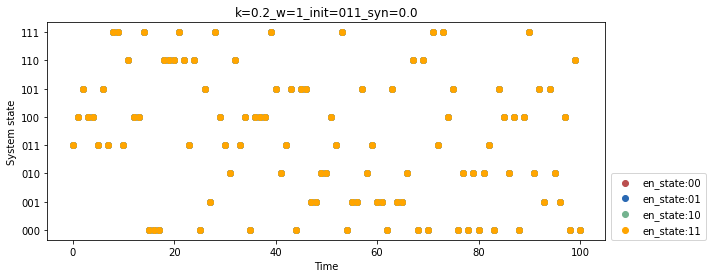

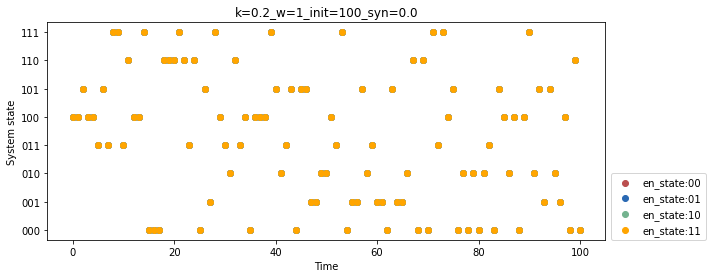

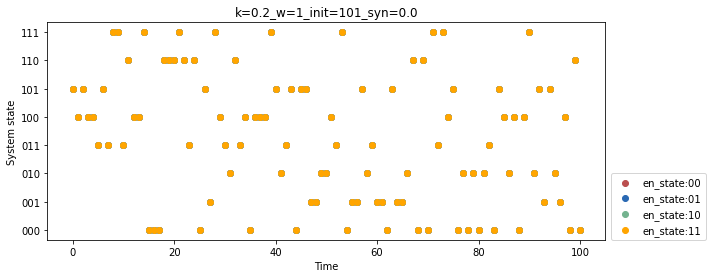

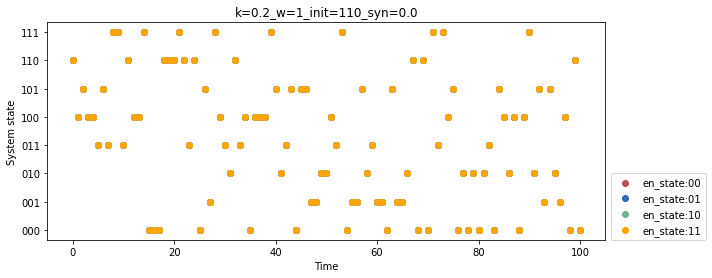

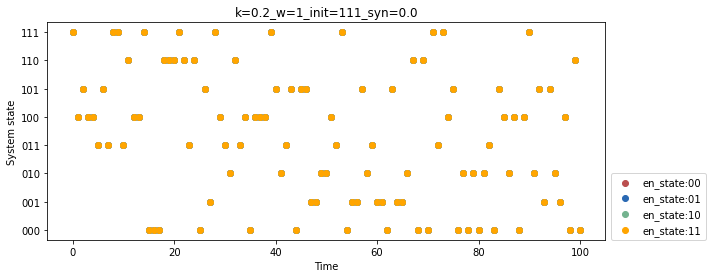

In [72]:
seeds = 1
steps = 100
tpm_v = tpm_syn(k=0, w=1)
name = 'k=0.2_w=1'
un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=2)   
colors = ["#BB4F4F", '#2A69B3', '#74B38F', '#FFA500']
strs = [decimal_to_binary(i, min_length=3) for i in range(8)]
for init_state in strs:
    fig, ax = plt.subplots(figsize=(10,4))
    for indx,en in enumerate(["00", "01", "10", "11"]):
        en_state = en
        for seed in range(seeds):
            serie, serie_str = tpm_series(tpm_dic[en_state], init_state, steps, seed)

            # 由于二进制字符串不能直接作为y轴的值，我们可以使用它们的索引作为y轴的值
            ax.scatter(range(steps+1), serie, label='en_state:'+en_state, color=colors[indx])

    # 设置轴标签
    ax.set_xlabel('Time')
    ax.set_ylabel('System state')

    # 设置y轴的标签
    ax.set_yticks(range(8))
    ax.set_yticklabels(strs)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc=[1.01, 0])
    plt.title(name + '_init=' + init_state + '_syn=' + str(round(syn,4)))
    # 显示图形
    plt.show()